In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

customer_df=pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [2]:
##First look at its main features (head, shape, info).
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [3]:
customer_df.head

<bound method NDFrame.head of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor      

In [5]:
customer_df.shape

(9134, 24)

In [6]:
##Rename the columns so they follow the PE8 (snake case).
customer_df.columns = customer_df.columns.str.lower()
customer_df.columns = customer_df.columns.str.replace(' ', '_')
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
##Change effective to date column to datetime format.
customer_df['effective_to_date']=pd.to_datetime(customer_df['effective_to_date'])
customer_df.effective_to_date

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [8]:
##Check NaN values per column
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [9]:
customer_df['customer'].duplicated().sum()

0

In [18]:
customer_df.select_dtypes(exclude=['object']).columns

Index(['customer_lifetime_value', 'effective_to_date', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'total_claim_amount'],
      dtype='object')

In [19]:
##Define a function that differentiates between continuous and discrete variables. 
##Hint: A number of unique values might be useful. 
##Store continuous data into a continuous variable and do the same for discrete and categorical.
for a in customer_df.select_dtypes(exclude=['object']).columns: 
    if len(pd.value_counts(customer_df[a]))>len(customer_df)*0.2:
        print(a, ": continous")
    else: print(a, ": discrete")

customer_lifetime_value : continous
effective_to_date : discrete
income : continous
monthly_premium_auto : discrete
months_since_last_claim : discrete
months_since_policy_inception : discrete
number_of_open_complaints : discrete
number_of_policies : discrete
total_claim_amount : continous


In [35]:
##For the categorical data, check if there is some kind of text in a variable so we would need to clean it. 
##Hint: Use the same method you used in step 7. 
##Depending on the implementation, decide what to do with the variables you get.
for a in customer_df.select_dtypes(include=['object']).columns: 
    print(customer_df[a].value_counts())

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
F    4658
M    4476
Name: gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
Personal Auto     67

In [37]:
##with customer_id column, we will need to drop it. 
customer_df.drop('customer', axis = 1)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [101]:
##Lab | Cleaning categorical data
##Load the continuous and discrete variables into continuous_df and discrete_df variables.
continuous_df = customer_df.select_dtypes(exclude=['object'])
discrete_df = customer_df.select_dtypes(exclude=['object'])
for a in customer_df.select_dtypes(exclude=['object']).columns: 
    if len(pd.value_counts(customer_df[a]))>len(customer_df)*0.1:
        discrete_df = discrete_df.drop(a, axis=1)
    else: continuous_df = continuous_df.drop(a, axis=1)

In [102]:
continuous_df

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,118844.660852
1,6979.535903,0,16222.001676
2,12887.431650,48767,124441.807794
3,7645.861827,0,16351.486342
4,2813.692575,43836,93575.646908
...,...,...,...
9129,23405.987980,71941,191090.445488
9130,3096.511217,21604,50159.422434
9131,8163.890428,0,17909.350822
9132,7524.442436,21941,60313.284872


In [103]:
discrete_df

,effective_to_date,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2011-02-24,69,32,5,0,1
1,2011-01-31,94,13,42,0,8
2,2011-02-19,108,18,38,0,2
3,2011-01-20,106,18,65,0,7
4,2011-02-03,73,12,44,0,1
...,...,...,...,...,...,...
9129,2011-02-10,73,18,89,0,2
9130,2011-02-12,79,14,28,0,1
9131,2011-02-06,85,9,37,3,2
9132,2011-02-03,96,34,3,0,3


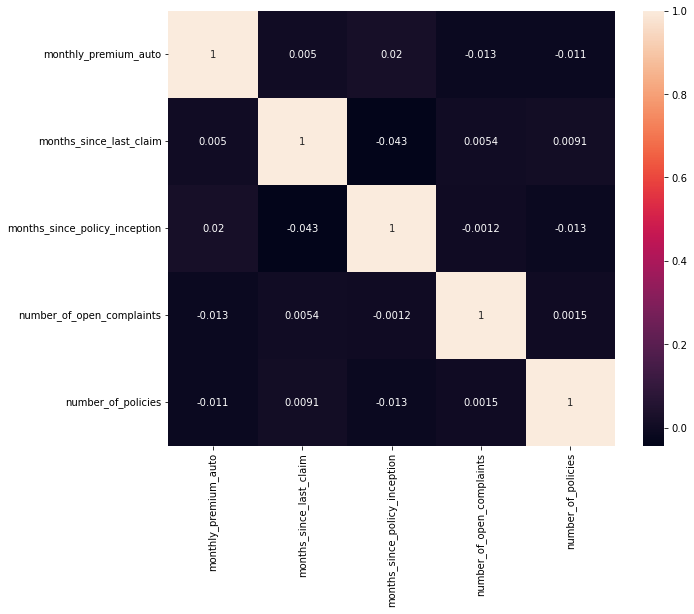

In [110]:
#Plot a correlation matrix, what can you see?
corr_matrix = discrete_df.corr(method = 'pearson')
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(corr_matrix, annot = True)
plt.show()


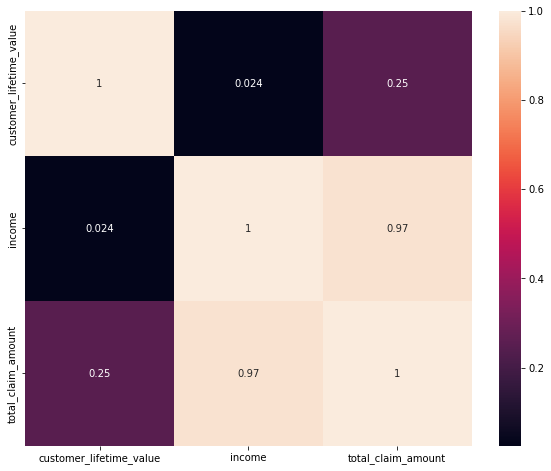

In [111]:
corr_matrix = continuous_df.corr(method = 'pearson')
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(corr_matrix, annot = True)
plt.show()
##high correlation between income and total_claim_amount

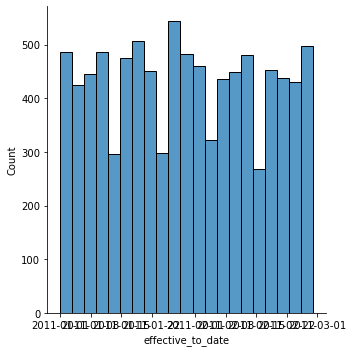

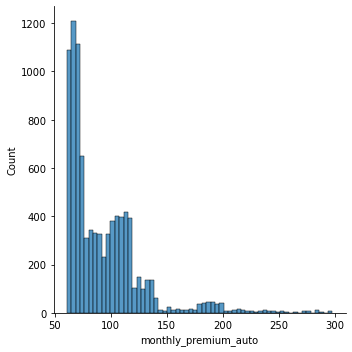

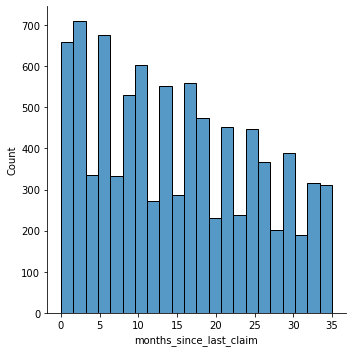

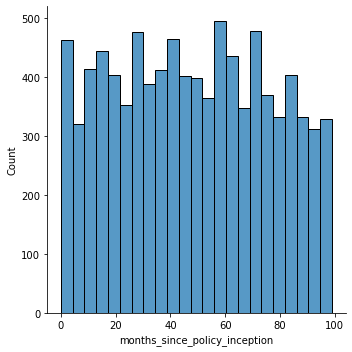

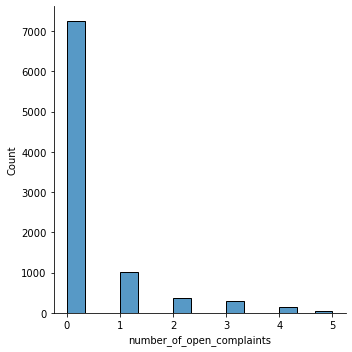

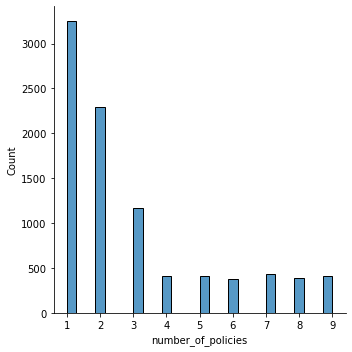

In [133]:
##Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).
for col in discrete_df.columns:
    sns.displot(x = discrete_df[col])
plt.show()


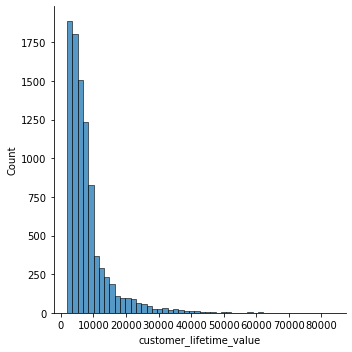

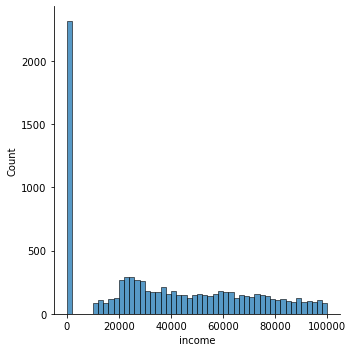

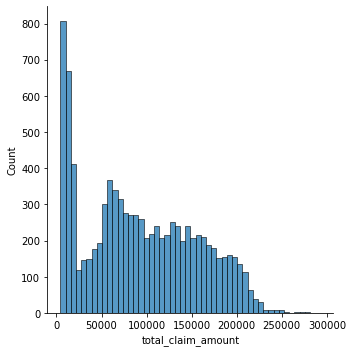

In [152]:
for col in continuous_df.columns:
    sns.displot(continuous_df[col], bins = 50)
plt.show()

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


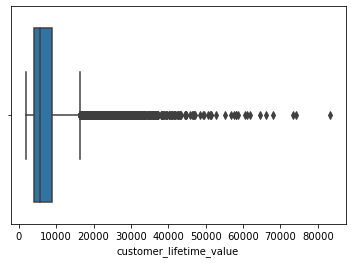

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


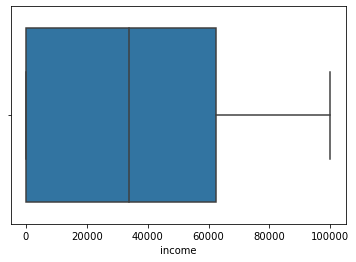

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


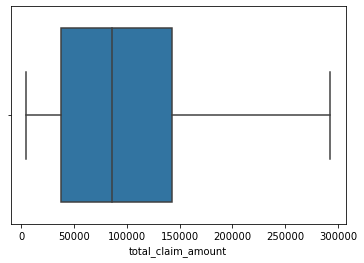

In [144]:
for col in continuous_df.columns:
    sns.boxplot(continuous_df[col])
    plt.show()

In [134]:
#What can you see in the plots?
##They are very skewed. 

In [201]:
##Have you found outliers? If you have, what should we do with them?
#I will drop the outliers, expecially for total_claim amount

iqr = np.percentile(continuous_df, 75)- np.percentile(continuous_df, 25)
upper_limit = np.percentile(continuous_df, 75) + 1.5*iqr
lower_limit = np.percentile(continuous_df, 75) - 1.5*iqr
continuous_df_clean= continuous_df[(continuous_df>lower_limit) & (continuous_df<upper_limit)]

In [204]:
continuous_df_clean = continuous_df_clean[~(continuous_df_clean['total_claim_amount'].isna())]


In [203]:
discrete_df_clean = discrete_df[~(continuous_df_clean['total_claim_amount'].isna())]

In [205]:
continuous_df_clean

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,118844.660852
1,6979.535903,0,16222.001676
2,12887.431650,48767,124441.807794
3,7645.861827,0,16351.486342
4,2813.692575,43836,93575.646908
...,...,...,...
9128,4100.398533,47761,104805.361080
9130,3096.511217,21604,50159.422434
9131,8163.890428,0,17909.350822
9132,7524.442436,21941,60313.284872


In [206]:
discrete_df_clean

,effective_to_date,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2011-02-24,69,32,5,0,1
1,2011-01-31,94,13,42,0,8
2,2011-02-19,108,18,38,0,2
3,2011-01-20,106,18,65,0,7
4,2011-02-03,73,12,44,0,1
...,...,...,...,...,...,...
9128,2011-01-06,104,16,58,0,1
9130,2011-02-12,79,14,28,0,1
9131,2011-02-06,85,9,37,3,2
9132,2011-02-03,96,34,3,0,3


In [213]:
##Lab | Feature extraction
#Open the categoricals variable we created before.
categoricals = customer_df.select_dtypes(np.object)
categoricals = categoricals.drop('customer', axis= 1 )

/var/folders/76/00lbr5fj2gs70r2y8qtskxk00000gn/T/ipykernel_45595/2608383771.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = customer_df.select_dtypes(np.object)


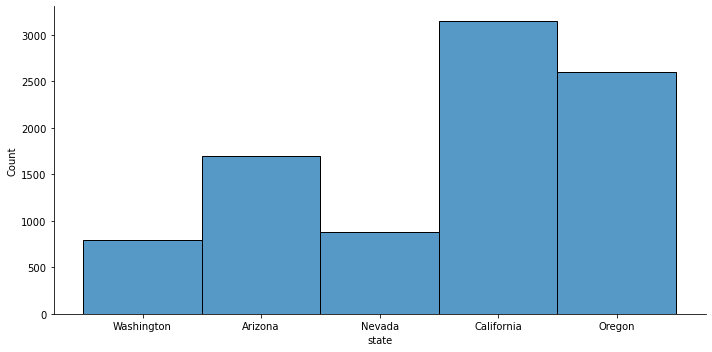

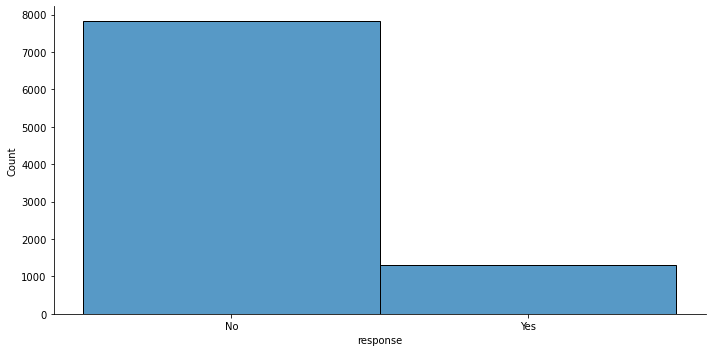

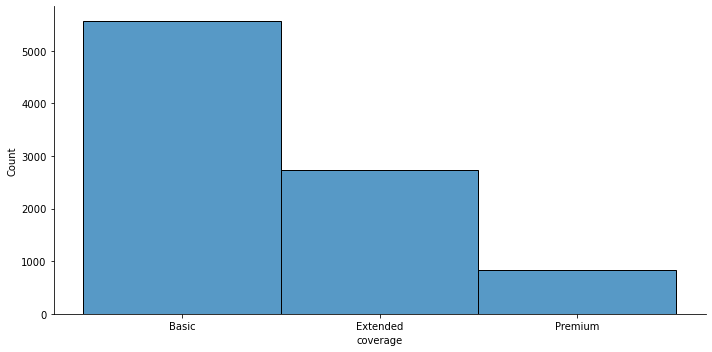

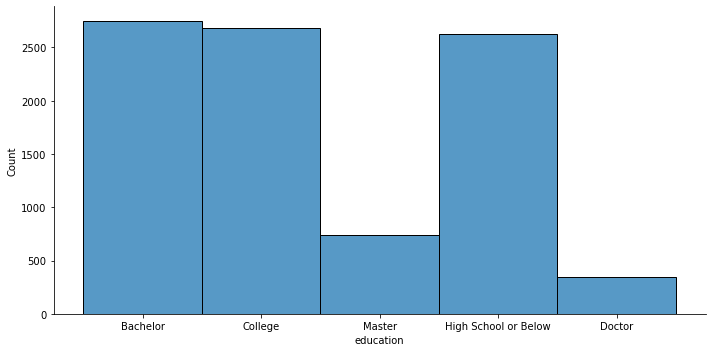

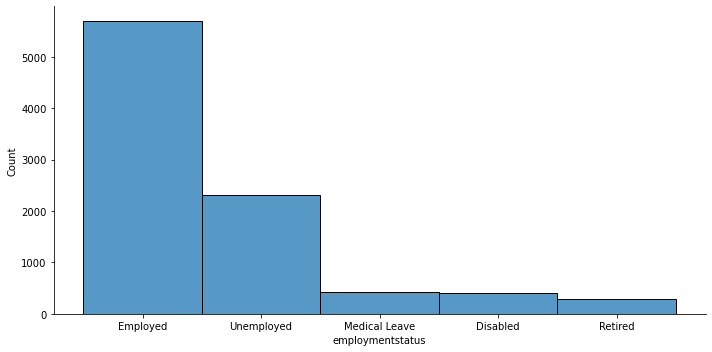

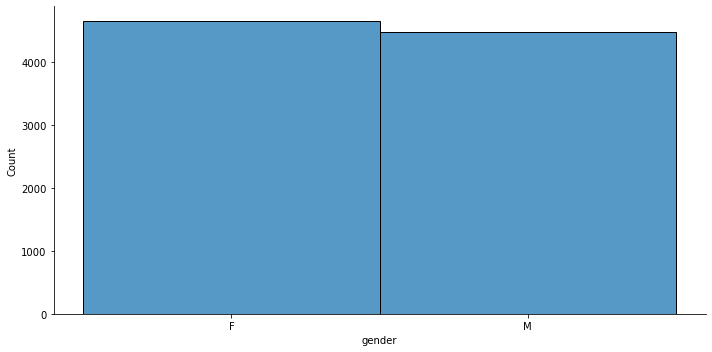

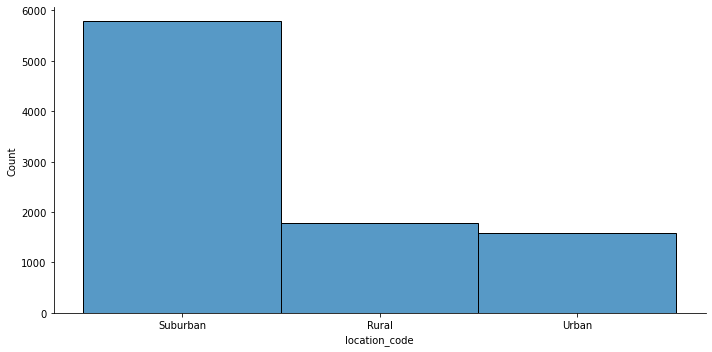

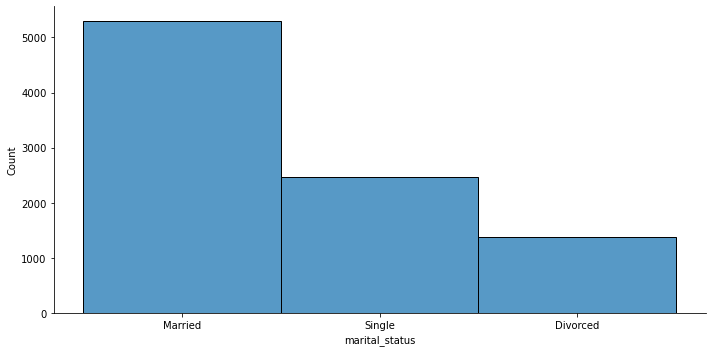

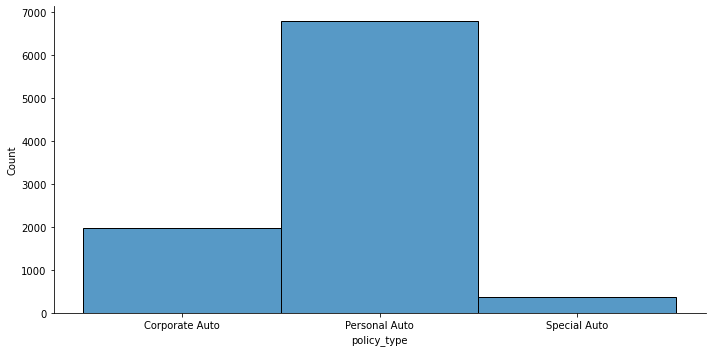

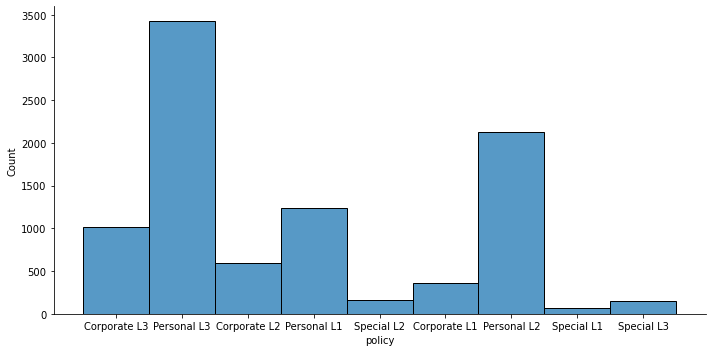

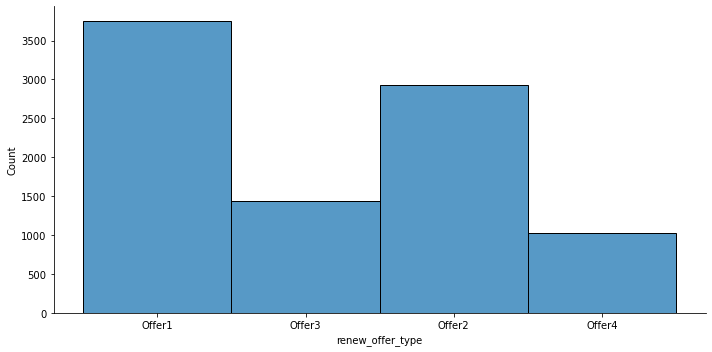

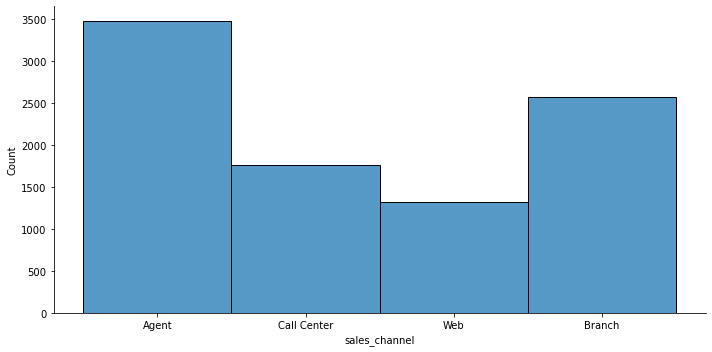

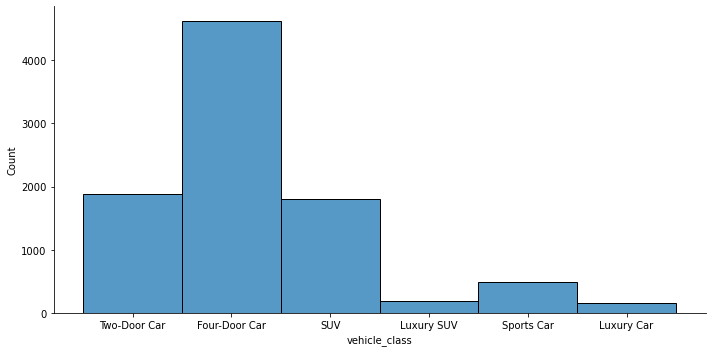

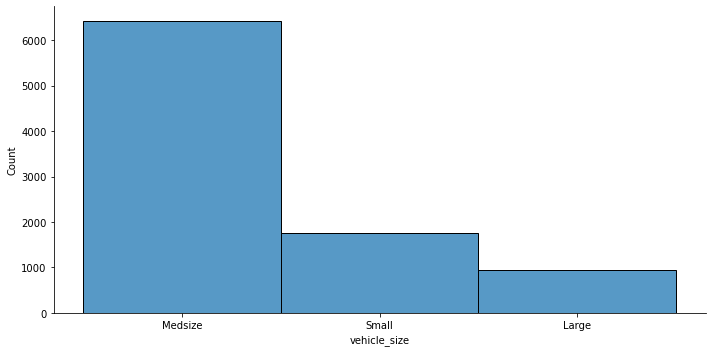

In [218]:
#Plot all the categorical variables with the proper plot. What can you see?
for col in categoricals.columns:
    sns.displot(categoricals[col], aspect=2)
plt.show()

In [219]:
##There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
#policy and policy_type are the same data, I would drop one of them. 
categoricals = categoricals.drop(['policy'], axis = 1 )
categoricals

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Offer3,Branch,Four-Door Car,Large


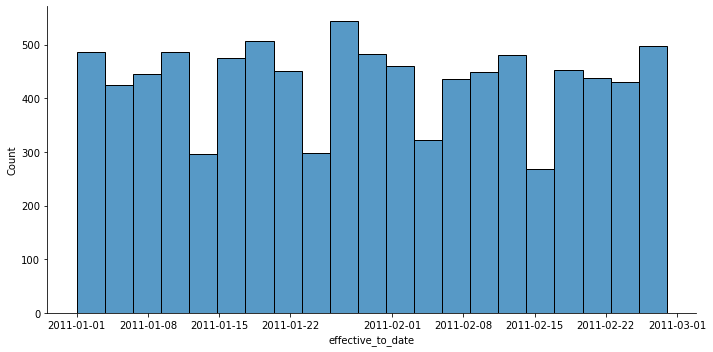

In [223]:
#Plot time variable. Can you extract something from it?
sns.displot(x = customer_df['effective_to_date'], aspect=2)
plt.show()
#all the data are between Jan to Feb